## 追加事例2 画像による判別 (イメージデータの多値分類)

### 共通事前処理

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

In [3]:
# 混同行列表示用関数

def make_cm(matrix, columns):
    # matrix numpy配列
    
    # columns 項目名リスト
    n = len(columns)
    
    # '正解データ'をn回繰り返すリスト生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n
    
    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

### A2.4 データ読み込みからデータ確認まで

#### データ読み込み

In [4]:
# データロード

# 手書き数字データ
# 時間がかかるので注意して下さい
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

In [5]:
# イメージの設定
image = mnist.data

# 正解データの設定
label = mnist.target

# 文字列を整数値に変換
y = label.astype(np.int)

In [6]:
# データ詳細説明

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

#### データ確認

In [7]:
# 配列サイズ確認
print("画像データ数:", image.shape)
print("ラベルデータ数:", y.shape)

画像データ数: (70000, 784)
ラベルデータ数: (70000,)


In [8]:
# labelとyの内容確認
print(label[:10])
print(y[:10])

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: int64


KeyError: 60000

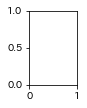

In [9]:
# 検証データ先頭20個のイメージ表示

# サイズ指定
plt.figure(figsize=(10, 3))

# 20個のイメージを表示
for i in range(20): 
    
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得
    img = image[60000+i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # 正解データをタイトル表示
    ax.set_title(label[60000+i])
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])
    
# 隣接画像同士がぶつからないようにする
plt.tight_layout()

# 表示
plt.show() 

### A2.5 データ前処理とデータ分割

#### データ前処理

In [ ]:
# 処理前

# (最初の方の値は全部0なので、0以外の値の部分を抽出)
print(image[0,175:185])

In [ ]:
# 正規化(normalization)

# 入力項目の値を0から1までの範囲とする
# NumPyのブロードキャスト機能を利用
x = image / 255.0

In [ ]:
# 結果確認

print(x[0,175:185])

#### データ分割

In [ ]:
# 訓練データと検証データに分割
# 事前にシャッフル済みなので、先頭60000行を訓練データとする。
x_train = x[:60000,:]
x_test = x[60000:,:]
y_train = y[:60000]
y_test = y[60000:]

In [ ]:
# 結果確認
print("学習画像データ数:", x_train.shape)
print("学習正解データ数:", y_train.shape)
print("検証画像データ数:", x_test.shape)
print("検証正解データ数:", y_test.shape)

### A2.6 アルゴリズムの選定

#### アルゴリズム選定

In [ ]:
# アルゴリズム選定

# サポートベクターマシンを利用する
from sklearn.svm import SVC
algorithm = SVC(random_state=random_seed)

### A2.7 学習・予測

#### 学習
処理に相当の時間がかかります(7分程度)

In [ ]:
# 学習
import time
start = time.time() 
algorithm.fit(x_train, y_train)
end = time.time()
elapsed = end - start
print(f'学習時間 {elapsed:.4f}秒')

 #### 予測

処理に相当の時間がかかります(2分程度)

In [ ]:
# 予測
import time
start = time.time() 
y_pred = algorithm.predict(x_test)
end = time.time()
elapsed = end - start
print(f'予測時間 {elapsed:.4f}秒')

### A2.8 評価

#### 評価

In [ ]:
# 混同行列表示
from sklearn.metrics import confusion_matrix
labels = range(10)
cm = confusion_matrix(y_test, y_pred, labels)
labels_str =  np.array(labels).astype(str)
cm_labeled = make_cm(cm, labels_str)
display(cm_labeled)

In [ ]:
# 適合率・再現率・F値表示
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
image_test = x_test * 255.0

# イメージ表示
plt.figure(figsize=(10, 3))

for i in range(20): 
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得
    img = image_test[i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # (正解データ):(予測結果)をタイトル表示
    title = f'{y_test[i]}:{y_pred[i]}'
    ax.set_title(title)
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])

# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show()     

### A2.9 チューニング

#### チューニング
Kerasをフレームワークとして使ったディープラーニングモデルを作り、精度を比較します。

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
pixel_size = 28

In [ ]:
# ディープラーニング用に入力データの整形

# 訓練用データ
x_train_tf = x_train.reshape(x_train.shape[0], 
    pixel_size, pixel_size, 1)

# 検証用データ
x_test_tf = x_test.reshape(x_test.shape[0], 
    pixel_size, pixel_size, 1)

# 入力データ形式
input_shape = x_train_tf.shape[1:]

# 結果確認
print(input_shape)

In [ ]:
# ディープラーニングモデルの作成
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# 損失関数・精度・学習法の指定

# 損失関数
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# 精度
acc = tf.keras.metrics.SparseCategoricalAccuracy()

# 学習法
optim = tf.keras.optimizers.Adam()

# モデルと結合
model.compile(optimizer=optim, loss=loss, metrics=[acc])

#### 学習
処理時間  
約30分(GPUなし)  
約1分(GPUあり)


In [ ]:
# 学習
model.fit(x_train_tf, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_tf, y_test))

#### 予測・評価

In [ ]:
# 予測結果取得
y_pred_tf = np.argmax(model.predict(x_test_tf), axis=-1)

In [ ]:
# 混同行列表示
cm2 = confusion_matrix(y_test, y_pred_tf, labels)
cm2_labeled = make_cm(cm2, labels_str)
display(cm2_labeled)

In [ ]:
# Presicion, Recall, F1値表示
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tf, digits=4))

In [ ]:
# イメージ表示
plt.figure(figsize=(10, 3))

for i in range(20): 
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得
    img = image_test[i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # (正解データ):(予測結果)をタイトル表示
    title = f'{y_test[i]}:{y_pred_tf[i]}'
    ax.set_title(title)
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])

# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show()         

### コラム　テキストデータを機械学習モデルの入力とする方法

In [ ]:
!pip install janome

In [ ]:
from janome.tokenizer import Tokenizer
t = Tokenizer()
text = '日本語をAIで扱うには、形態素解析処理が必須です。'
tokens = t.tokenize(text, wakati=True)
print(tokens)

In [ ]:
s = set(tokens) # リストを集合に変換
l = list(s)  # 再度リストに戻す
l.sort()  # ソート
print(l)  # 結果確認

In [ ]:
# リストから単語辞書を作成する
w2n = {}
for ind, word in enumerate(l):
    w2n[word] = ind
print(w2n)

In [ ]:
# 辞書を使って単語を数値に変換
nums = [w2n[item] for item in tokens]
    
# 結果確認
print(nums)